**Import packages**

In [1]:
!pip install pytictoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
from sklearn.model_selection import train_test_split
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Create helper functions**

In [4]:
def plot_sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    plt.xlabel('Image Label: {}'.format(classes[y[index]]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history,filename,dpi):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  if epochs <= 60: plt.xticks(np.arange(0, epochs + 1, step=5))
  else: plt.xticks(np.arange(0, epochs + 1, step=20))
  if 'val_loss' in history.history.keys():
    plt.plot(epoch_data,history.history['val_loss'],'o--')
    plt.legend(['Training','Validation'])
  else:
    plt.legend(['Training'])
  plt.savefig(filename, dpi=dpi)
  plt.show()

**Plot sample image**

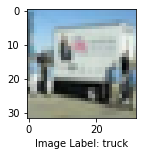

In [5]:
plot_sample_image(X_train, y_train, np.random.randint(100))

**Normalize the input data**

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# MLP (multi-layer perceptron) classifier 

**Fit the model**

In [7]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

C_MLP = models.Sequential([
        layers.Flatten(input_shape=X_train.shape[1:]),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')    
    ])

C_MLP.summary()

learning_rate =  0.0001
C_MLP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

t_MLP = TicToc()
t_MLP.tic()
early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history_C_MLP = C_MLP.fit(X_train, y_train, epochs=200, batch_size=32,
            validation_split = 0.1, callbacks = early_callbacks, verbose=1)
t_MLP.toc()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

**Check testing accuracy**

In [8]:
C_MLP.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4468 - accuracy: 0.4804


[1.446766972541809, 0.4803999960422516]

**Plot training and validation loss**

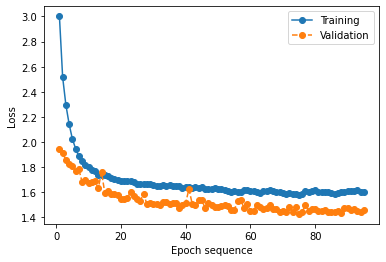

In [9]:
filename = 'Training history CIFAR10 [MLP]'+'.png'
plot_fitting_history(history_C_MLP, filename, dpi = 100)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.47      0.53      1000
           1       0.63      0.54      0.58      1000
           2       0.40      0.31      0.35      1000
           3       0.33      0.27      0.29      1000
           4       0.49      0.34      0.40      1000
           5       0.47      0.30      0.37      1000
           6       0.37      0.76      0.50      1000
           7       0.58      0.52      0.55      1000
           8       0.52      0.71      0.60      1000
           9       0.53      0.58      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



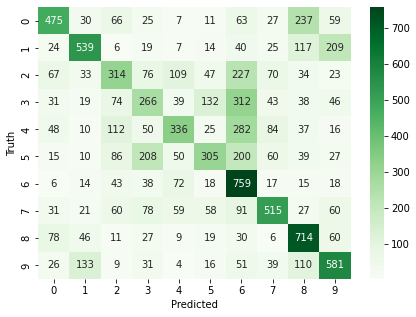

In [10]:
y_pred = C_MLP.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

In [11]:
C_MLP.save('MLP_CIFAR10.h5')

In [12]:
from keras.models import load_model
MLP_CIFAR10 = load_model('MLP_CIFAR10.h5')

In [13]:
MLP_CIFAR10.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4468 - accuracy: 0.4804


[1.446766972541809, 0.4803999960422516]